In [128]:
import os
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import requests
import tarfile
from io import BytesIO, StringIO
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
def getData():
    response = requests.get("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz")
    with open('housing.tgz','wb') as outf:
        outf.write(response.content)
    tgz = tarfile.open('housing.tgz')
    tgz.extractall('.')

In [547]:
def getHousingDataframe():
    housing = pd.read_csv('housing.csv')
    return housing

In [548]:
df = getHousingDataframe()

In [549]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [550]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [551]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


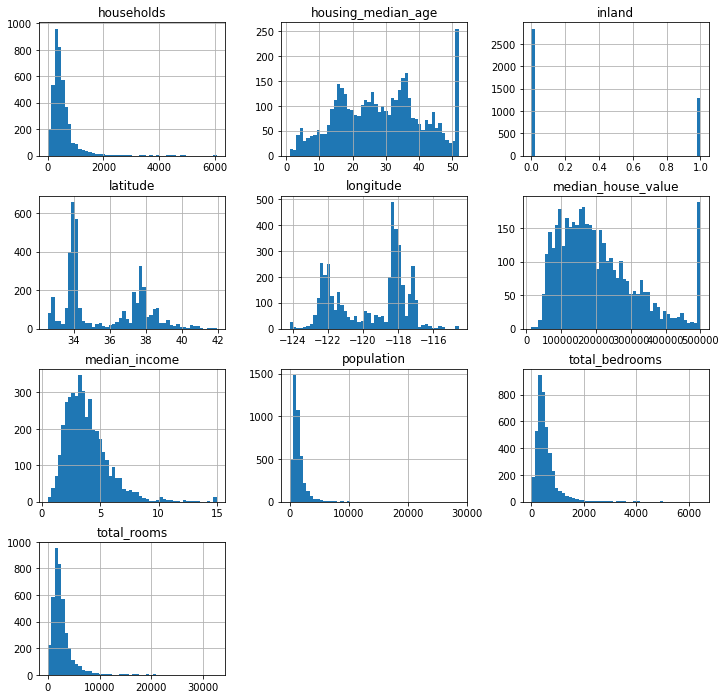

In [552]:
housing.hist(bins=50,figsize=(12,12));

In [553]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]
y = df[['median_house_value']]

In [554]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [555]:
np.ceil((df.median_income / 1.5)).head()

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: median_income, dtype: float64

In [556]:
df['income_cat'] = np.ceil((df.median_income / 1.5))

In [557]:
df["inland"] = df["ocean_proximity"].apply(lambda x: 1 if x=="INLAND" else 0)

In [558]:
df.income_cat.where(df.income_cat < 5,5,inplace=True)

In [559]:
split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

In [560]:
for train_split, test_split in split.split(df,df.income_cat):
    strat_train_split = df.loc[train_split]
    strat_test_split = df.loc[test_split]

In [561]:
df.income_cat.value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [562]:
strat_train_split.income_cat.value_counts() / len(strat_train_split)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [563]:
for set_ in (strat_train_split,strat_test_split):
    set_.drop("income_cat",axis=1,inplace=True)
    set_.drop("ocean_proximity",axis=1,inplace=True)

In [564]:
housing = strat_train_split.copy()

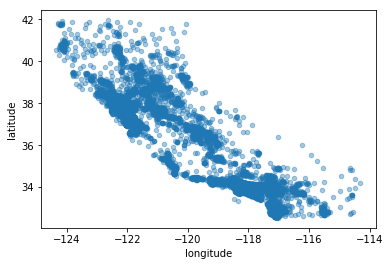

In [565]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4);

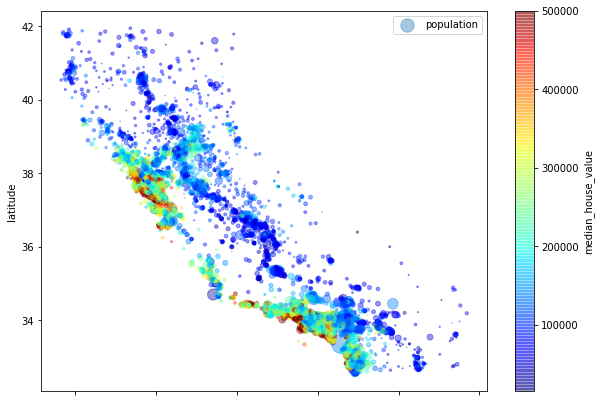

In [566]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing.population/100,label="population",
            figsize=(10,7),
            c="median_house_value",
            cmap=plt.get_cmap("jet"),colorbar=True);

In [569]:
attrs = ['median_house_value','median_income','total_rooms','housing_median_age']

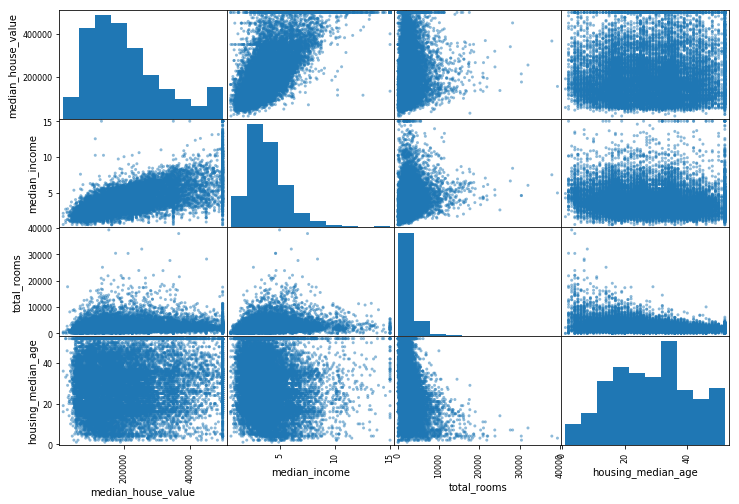

In [570]:
scatter_matrix(housing[attrs],figsize=(12,8));

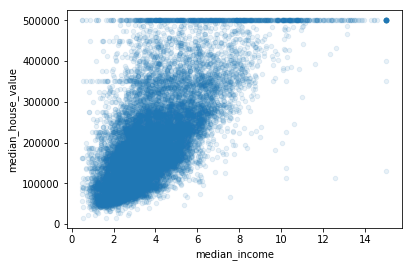

In [571]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

Data cleaning

In [572]:
housing = strat_train_split.drop("median_house_value",axis=1)

In [573]:
housing_labels = strat_train_split["median_house_value"].copy()

Text and Categorical attribute handling

In [171]:
from sklearn.preprocessing import Imputer

In [197]:
from sklearn.preprocessing import OneHotEncoder

In [229]:
from sklearn.base import BaseEstimator, TransformerMixin

In [574]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [575]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

            

In [576]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X[self.attribute_names].values

In [577]:
from sklearn.preprocessing import MinMaxScaler

In [578]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [579]:
num_attrs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','inland']
cat_attrs = ["inland"]

In [580]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attrs)),
    ('imputer',Imputer(strategy="median")),
    ('attribs_adder',CombinedAttributesAdder()),
    ('scaler',MinMaxScaler())
])

In [581]:
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attrs))
])

In [582]:
full_pipeline = FeatureUnion([
    ('num_pipeline',num_pipeline)
])

In [583]:
housing_prepared = full_pipeline.fit_transform(housing)

Select and Train a Model

In [584]:
from sklearn.linear_model import LinearRegression

In [585]:
lin_reg = LinearRegression()

In [586]:
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [587]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68664.587433698427

In [588]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [523]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
    scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [524]:
tree_rmse_scores

array([ 68813.1379816 ,  69484.98657527,  70814.97165899,  68482.51465246,
        70619.27284529,  76115.06180753,  69731.02195186,  69926.18314482,
        74701.00184713,  69986.81444852])

In [525]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Stddev:',scores.std())

In [526]:
display_scores(tree_rmse_scores)

Scores: [ 68813.1379816   69484.98657527  70814.97165899  68482.51465246
  70619.27284529  76115.06180753  69731.02195186  69926.18314482
  74701.00184713  69986.81444852]
Mean: 70867.4966913
Stddev: 2388.93670655


In [338]:
from sklearn.ensemble import RandomForestRegressor

In [527]:
rf_reg = RandomForestRegressor(n_estimators=30,max_features=8)
rf_reg.fit(housing_prepared, housing_labels)
housing_predictions = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels,housing_predictions)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

19442.489130531627

In [528]:
scores = cross_val_score(rf_reg,housing_prepared,housing_labels,
    scoring="neg_mean_squared_error",cv=10)
rf_rmse_scores = np.sqrt(-scores)

In [529]:
display_scores(rf_rmse_scores)

Scores: [ 49721.49772309  47842.89107505  49757.80406082  51796.27166038
  49024.59095972  53960.70735149  48875.16816206  47675.01466741
  53187.96446201  49448.57838134]
Mean: 50129.0488503
Stddev: 2040.24531168


In [345]:
from sklearn.model_selection import GridSearchCV

In [349]:
param_grid = [
    {'n_estimators':[3,10,30],
     'max_features':[2,4,6,8]
    }
]

In [530]:
forest_reg = RandomForestRegressor()

In [531]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring='neg_mean_squared_error')
grid_res = grid_search.fit(housing_prepared,housing_labels)

In [532]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [541]:
rf_reg = grid_search.best_estimator_
rf_reg.fit(housing_prepared, housing_labels)
housing_predictions = rf_reg.predict(housing_prepared)
rf_mse = mean_squared_error(housing_labels,housing_predictions)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

19514.409823171831

In [534]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [535]:
feature_importances

array([ 0.07466619,  0.06497522,  0.04317921,  0.01550993,  0.01449263,
        0.01488118,  0.01496512,  0.34791264,  0.17352723,  0.06168756,
        0.11034047,  0.06386262])

In [536]:
extra_attribs = ["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]

In [537]:
attrs = num_attrs + extra_attribs

In [538]:
sorted(zip(feature_importances,attrs),reverse=True)

[(0.34791264428050661, 'median_income'),
 (0.17352723446122001, 'inland'),
 (0.11034046796756369, 'pop_per_hhold'),
 (0.074666191334651855, 'longitude'),
 (0.064975215476888046, 'latitude'),
 (0.063862623513046016, 'bedrooms_per_room'),
 (0.06168755947640428, 'rooms_per_hhold'),
 (0.043179205114587012, 'housing_median_age'),
 (0.015509930364177367, 'total_rooms'),
 (0.014965118895800536, 'households'),
 (0.014881182959231069, 'population'),
 (0.014492626155923456, 'total_bedrooms')]

In [539]:
from sklearn.externals import joblib

In [542]:
joblib.dump(rf_reg,'my_tuned_rf_model.pkl')

['my_tuned_rf_model.pkl']

In [589]:
final_model = rf_reg
X_test = strat_test_split.drop("median_house_value",axis=1)
y_test = strat_test_split["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [591]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [592]:
print(final_rmse)

47974.5526893
